## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.27752 | train_mse: 1.10864 | train_mae: 0.75683 |  0:00:00s


epoch 1  | loss: 0.98543 | train_mse: 0.87879 | train_mae: 0.64724 |  0:00:00s


epoch 2  | loss: 0.82338 | train_mse: 0.67887 | train_mae: 0.52067 |  0:00:01s


epoch 3  | loss: 0.60523 | train_mse: 0.45837 | train_mae: 0.46866 |  0:00:01s


epoch 4  | loss: 0.45172 | train_mse: 0.47544 | train_mae: 0.4825  |  0:00:01s


epoch 5  | loss: 0.40958 | train_mse: 0.39913 | train_mae: 0.42955 |  0:00:01s


epoch 6  | loss: 0.3971  | train_mse: 0.30074 | train_mae: 0.36602 |  0:00:02s


epoch 7  | loss: 0.3544  | train_mse: 0.32047 | train_mae: 0.37034 |  0:00:02s


epoch 8  | loss: 0.35676 | train_mse: 0.25712 | train_mae: 0.36726 |  0:00:02s


epoch 9  | loss: 0.28135 | train_mse: 0.18949 | train_mae: 0.32192 |  0:00:03s


epoch 10 | loss: 0.30843 | train_mse: 0.1483  | train_mae: 0.29083 |  0:00:03s


epoch 11 | loss: 0.25928 | train_mse: 0.18009 | train_mae: 0.30122 |  0:00:03s


epoch 12 | loss: 0.26626 | train_mse: 0.18376 | train_mae: 0.30242 |  0:00:04s


epoch 13 | loss: 0.23054 | train_mse: 0.26046 | train_mae: 0.34485 |  0:00:04s


epoch 14 | loss: 0.27964 | train_mse: 0.16783 | train_mae: 0.28965 |  0:00:04s


epoch 15 | loss: 0.26043 | train_mse: 0.18616 | train_mae: 0.30199 |  0:00:04s


epoch 16 | loss: 0.2395  | train_mse: 0.15461 | train_mae: 0.27447 |  0:00:05s


epoch 17 | loss: 0.20602 | train_mse: 0.21199 | train_mae: 0.31214 |  0:00:05s


epoch 18 | loss: 0.2077  | train_mse: 0.14151 | train_mae: 0.28751 |  0:00:05s


epoch 19 | loss: 0.17821 | train_mse: 0.14418 | train_mae: 0.27712 |  0:00:06s


epoch 20 | loss: 0.18983 | train_mse: 0.15566 | train_mae: 0.2976  |  0:00:06s


epoch 21 | loss: 0.26034 | train_mse: 0.16947 | train_mae: 0.29492 |  0:00:06s


epoch 22 | loss: 0.19844 | train_mse: 0.12967 | train_mae: 0.26916 |  0:00:07s


epoch 23 | loss: 0.20803 | train_mse: 0.11749 | train_mae: 0.25102 |  0:00:07s


epoch 24 | loss: 0.18448 | train_mse: 0.12849 | train_mae: 0.25509 |  0:00:07s


epoch 25 | loss: 0.20894 | train_mse: 0.11609 | train_mae: 0.24694 |  0:00:07s


epoch 26 | loss: 0.18426 | train_mse: 0.1075  | train_mae: 0.24278 |  0:00:08s


epoch 27 | loss: 0.21884 | train_mse: 0.12473 | train_mae: 0.26554 |  0:00:08s


epoch 28 | loss: 0.20832 | train_mse: 0.13777 | train_mae: 0.27015 |  0:00:08s


epoch 29 | loss: 0.195   | train_mse: 0.12891 | train_mae: 0.26021 |  0:00:09s


epoch 30 | loss: 0.21425 | train_mse: 0.11107 | train_mae: 0.2425  |  0:00:09s


epoch 31 | loss: 0.21766 | train_mse: 0.117   | train_mae: 0.25504 |  0:00:09s


epoch 32 | loss: 0.18537 | train_mse: 0.12129 | train_mae: 0.25181 |  0:00:09s


epoch 33 | loss: 0.21572 | train_mse: 0.12905 | train_mae: 0.2593  |  0:00:10s


epoch 34 | loss: 0.21954 | train_mse: 0.14385 | train_mae: 0.27234 |  0:00:10s


epoch 35 | loss: 0.23801 | train_mse: 0.11203 | train_mae: 0.24635 |  0:00:10s


epoch 36 | loss: 0.1721  | train_mse: 0.17097 | train_mae: 0.25804 |  0:00:11s


epoch 37 | loss: 0.16637 | train_mse: 0.15491 | train_mae: 0.26442 |  0:00:11s


epoch 38 | loss: 0.1826  | train_mse: 0.14005 | train_mae: 0.26462 |  0:00:11s


epoch 39 | loss: 0.22471 | train_mse: 0.12274 | train_mae: 0.24846 |  0:00:11s


epoch 40 | loss: 0.23632 | train_mse: 0.13992 | train_mae: 0.25224 |  0:00:12s


epoch 41 | loss: 0.20941 | train_mse: 0.10231 | train_mae: 0.23492 |  0:00:12s


epoch 42 | loss: 0.15047 | train_mse: 0.10448 | train_mae: 0.22976 |  0:00:12s


epoch 43 | loss: 0.16795 | train_mse: 0.09958 | train_mae: 0.22935 |  0:00:13s


epoch 44 | loss: 0.15615 | train_mse: 0.10326 | train_mae: 0.23137 |  0:00:13s


epoch 45 | loss: 0.17281 | train_mse: 0.13163 | train_mae: 0.24782 |  0:00:13s


epoch 46 | loss: 0.1745  | train_mse: 0.12191 | train_mae: 0.24325 |  0:00:14s


epoch 47 | loss: 0.1734  | train_mse: 0.11823 | train_mae: 0.24386 |  0:00:14s


epoch 48 | loss: 0.1794  | train_mse: 0.09949 | train_mae: 0.22458 |  0:00:14s


epoch 49 | loss: 0.15012 | train_mse: 0.10951 | train_mae: 0.23836 |  0:00:14s


epoch 50 | loss: 0.17018 | train_mse: 0.09063 | train_mae: 0.22191 |  0:00:15s


epoch 51 | loss: 0.15689 | train_mse: 0.11749 | train_mae: 0.25206 |  0:00:15s


epoch 52 | loss: 0.17748 | train_mse: 0.10424 | train_mae: 0.23015 |  0:00:15s


epoch 53 | loss: 0.16877 | train_mse: 0.09713 | train_mae: 0.22748 |  0:00:16s


epoch 54 | loss: 0.14426 | train_mse: 0.09701 | train_mae: 0.23575 |  0:00:16s


epoch 55 | loss: 0.17493 | train_mse: 0.0995  | train_mae: 0.24261 |  0:00:16s


epoch 56 | loss: 0.12794 | train_mse: 0.09387 | train_mae: 0.22201 |  0:00:17s


epoch 57 | loss: 0.12266 | train_mse: 0.09241 | train_mae: 0.22246 |  0:00:17s


epoch 58 | loss: 0.1674  | train_mse: 0.10368 | train_mae: 0.23024 |  0:00:17s


epoch 59 | loss: 0.18845 | train_mse: 0.11767 | train_mae: 0.23706 |  0:00:17s


epoch 60 | loss: 0.1877  | train_mse: 0.10944 | train_mae: 0.22606 |  0:00:18s


epoch 61 | loss: 0.17368 | train_mse: 0.10826 | train_mae: 0.22768 |  0:00:18s


epoch 62 | loss: 0.17797 | train_mse: 0.11274 | train_mae: 0.23243 |  0:00:19s


epoch 63 | loss: 0.16238 | train_mse: 0.10129 | train_mae: 0.22687 |  0:00:19s


epoch 64 | loss: 0.17208 | train_mse: 0.09233 | train_mae: 0.21232 |  0:00:19s


epoch 65 | loss: 0.12691 | train_mse: 0.08867 | train_mae: 0.21536 |  0:00:20s


epoch 66 | loss: 0.16337 | train_mse: 0.1104  | train_mae: 0.22915 |  0:00:20s


epoch 67 | loss: 0.1537  | train_mse: 0.09142 | train_mae: 0.21656 |  0:00:20s


epoch 68 | loss: 0.17075 | train_mse: 0.08079 | train_mae: 0.20883 |  0:00:20s


epoch 69 | loss: 0.11672 | train_mse: 0.10725 | train_mae: 0.22882 |  0:00:21s


epoch 70 | loss: 0.1282  | train_mse: 0.11324 | train_mae: 0.22348 |  0:00:21s


epoch 71 | loss: 0.13044 | train_mse: 0.09791 | train_mae: 0.21198 |  0:00:21s


epoch 72 | loss: 0.18545 | train_mse: 0.09128 | train_mae: 0.21991 |  0:00:22s


epoch 73 | loss: 0.12229 | train_mse: 0.07657 | train_mae: 0.20198 |  0:00:22s


epoch 74 | loss: 0.17444 | train_mse: 0.08281 | train_mae: 0.20773 |  0:00:22s


epoch 75 | loss: 0.15216 | train_mse: 0.08639 | train_mae: 0.20032 |  0:00:22s


epoch 76 | loss: 0.19635 | train_mse: 0.09476 | train_mae: 0.21891 |  0:00:23s


epoch 77 | loss: 0.11714 | train_mse: 0.08471 | train_mae: 0.2032  |  0:00:23s


epoch 78 | loss: 0.13371 | train_mse: 0.0815  | train_mae: 0.21132 |  0:00:23s


epoch 79 | loss: 0.1673  | train_mse: 0.07835 | train_mae: 0.20534 |  0:00:24s


epoch 80 | loss: 0.11081 | train_mse: 0.08597 | train_mae: 0.21378 |  0:00:24s


epoch 81 | loss: 0.10573 | train_mse: 0.10796 | train_mae: 0.22502 |  0:00:24s


epoch 82 | loss: 0.10601 | train_mse: 0.08492 | train_mae: 0.21875 |  0:00:25s


epoch 83 | loss: 0.10483 | train_mse: 0.07501 | train_mae: 0.20281 |  0:00:25s


epoch 84 | loss: 0.14797 | train_mse: 0.10028 | train_mae: 0.22912 |  0:00:25s


epoch 85 | loss: 0.10216 | train_mse: 0.08124 | train_mae: 0.20569 |  0:00:25s


epoch 86 | loss: 0.18728 | train_mse: 0.10198 | train_mae: 0.21328 |  0:00:26s


epoch 87 | loss: 0.13271 | train_mse: 0.10028 | train_mae: 0.21372 |  0:00:26s


epoch 88 | loss: 0.14718 | train_mse: 0.116   | train_mae: 0.2276  |  0:00:26s


epoch 89 | loss: 0.14139 | train_mse: 0.11016 | train_mae: 0.21919 |  0:00:27s


epoch 90 | loss: 0.17089 | train_mse: 0.10236 | train_mae: 0.22044 |  0:00:27s


epoch 91 | loss: 0.17246 | train_mse: 0.09916 | train_mae: 0.21646 |  0:00:27s


epoch 92 | loss: 0.12988 | train_mse: 0.09467 | train_mae: 0.21308 |  0:00:28s


epoch 93 | loss: 0.10961 | train_mse: 0.10342 | train_mae: 0.21401 |  0:00:28s


epoch 94 | loss: 0.13819 | train_mse: 0.08406 | train_mae: 0.20655 |  0:00:28s


epoch 95 | loss: 0.12822 | train_mse: 0.10368 | train_mae: 0.22016 |  0:00:29s


epoch 96 | loss: 0.12797 | train_mse: 0.07619 | train_mae: 0.19495 |  0:00:29s


epoch 97 | loss: 0.15397 | train_mse: 0.07721 | train_mae: 0.19304 |  0:00:29s


epoch 98 | loss: 0.10883 | train_mse: 0.09882 | train_mae: 0.20552 |  0:00:30s


epoch 99 | loss: 0.14493 | train_mse: 0.07716 | train_mae: 0.1943  |  0:00:30s


epoch 100| loss: 0.10444 | train_mse: 0.08818 | train_mae: 0.20666 |  0:00:30s


epoch 101| loss: 0.11852 | train_mse: 0.0929  | train_mae: 0.19845 |  0:00:30s


epoch 102| loss: 0.12491 | train_mse: 0.11823 | train_mae: 0.20956 |  0:00:31s


epoch 103| loss: 0.17731 | train_mse: 0.11935 | train_mae: 0.22318 |  0:00:31s


epoch 104| loss: 0.1651  | train_mse: 0.09133 | train_mae: 0.21802 |  0:00:31s


epoch 105| loss: 0.13796 | train_mse: 0.09012 | train_mae: 0.21707 |  0:00:32s


epoch 106| loss: 0.12209 | train_mse: 0.08751 | train_mae: 0.20222 |  0:00:32s


epoch 107| loss: 0.14816 | train_mse: 0.10096 | train_mae: 0.22519 |  0:00:32s


epoch 108| loss: 0.13146 | train_mse: 0.07696 | train_mae: 0.20135 |  0:00:32s


epoch 109| loss: 0.12202 | train_mse: 0.09165 | train_mae: 0.21867 |  0:00:33s


epoch 110| loss: 0.13516 | train_mse: 0.07626 | train_mae: 0.20099 |  0:00:33s


epoch 111| loss: 0.10906 | train_mse: 0.07464 | train_mae: 0.20143 |  0:00:33s


epoch 112| loss: 0.10796 | train_mse: 0.07371 | train_mae: 0.19656 |  0:00:34s


epoch 113| loss: 0.11984 | train_mse: 0.07234 | train_mae: 0.19122 |  0:00:34s


epoch 114| loss: 0.1365  | train_mse: 0.08601 | train_mae: 0.21108 |  0:00:34s


epoch 115| loss: 0.13837 | train_mse: 0.07949 | train_mae: 0.19883 |  0:00:35s


epoch 116| loss: 0.14412 | train_mse: 0.07807 | train_mae: 0.19646 |  0:00:35s


epoch 117| loss: 0.10271 | train_mse: 0.08547 | train_mae: 0.20119 |  0:00:35s


epoch 118| loss: 0.1323  | train_mse: 0.08462 | train_mae: 0.19608 |  0:00:35s


epoch 119| loss: 0.17637 | train_mse: 0.09478 | train_mae: 0.20465 |  0:00:36s


epoch 120| loss: 0.16065 | train_mse: 0.09115 | train_mae: 0.21133 |  0:00:36s


epoch 121| loss: 0.15203 | train_mse: 0.07252 | train_mae: 0.1922  |  0:00:36s


epoch 122| loss: 0.16175 | train_mse: 0.08219 | train_mae: 0.20303 |  0:00:37s


epoch 123| loss: 0.12133 | train_mse: 0.06781 | train_mae: 0.19101 |  0:00:37s


epoch 124| loss: 0.10046 | train_mse: 0.08917 | train_mae: 0.20208 |  0:00:37s


epoch 125| loss: 0.11203 | train_mse: 0.07799 | train_mae: 0.19557 |  0:00:37s


epoch 126| loss: 0.13683 | train_mse: 0.08615 | train_mae: 0.20662 |  0:00:38s


epoch 127| loss: 0.11932 | train_mse: 0.11129 | train_mae: 0.22378 |  0:00:38s


epoch 128| loss: 0.17016 | train_mse: 0.10777 | train_mae: 0.22028 |  0:00:38s


epoch 129| loss: 0.12866 | train_mse: 0.07922 | train_mae: 0.20491 |  0:00:39s


epoch 130| loss: 0.14384 | train_mse: 0.07498 | train_mae: 0.20189 |  0:00:39s


epoch 131| loss: 0.12792 | train_mse: 0.07129 | train_mae: 0.20118 |  0:00:39s


epoch 132| loss: 0.11437 | train_mse: 0.08656 | train_mae: 0.19603 |  0:00:40s


epoch 133| loss: 0.13382 | train_mse: 0.07519 | train_mae: 0.19476 |  0:00:40s


epoch 134| loss: 0.0959  | train_mse: 0.10069 | train_mae: 0.19952 |  0:00:40s


epoch 135| loss: 0.11945 | train_mse: 0.08383 | train_mae: 0.20451 |  0:00:40s


epoch 136| loss: 0.13578 | train_mse: 0.08823 | train_mae: 0.20785 |  0:00:41s


epoch 137| loss: 0.17796 | train_mse: 0.07547 | train_mae: 0.20173 |  0:00:41s


epoch 138| loss: 0.12375 | train_mse: 0.07328 | train_mae: 0.20004 |  0:00:41s


epoch 139| loss: 0.12366 | train_mse: 0.07882 | train_mae: 0.20836 |  0:00:42s


epoch 140| loss: 0.12383 | train_mse: 0.07541 | train_mae: 0.2015  |  0:00:42s


epoch 141| loss: 0.10934 | train_mse: 0.08234 | train_mae: 0.20921 |  0:00:42s


epoch 142| loss: 0.13004 | train_mse: 0.08023 | train_mae: 0.20317 |  0:00:42s


epoch 143| loss: 0.12284 | train_mse: 0.08905 | train_mae: 0.21979 |  0:00:43s


epoch 144| loss: 0.12119 | train_mse: 0.07928 | train_mae: 0.20491 |  0:00:43s


epoch 145| loss: 0.14103 | train_mse: 0.06651 | train_mae: 0.17972 |  0:00:43s


epoch 146| loss: 0.10116 | train_mse: 0.07254 | train_mae: 0.19933 |  0:00:44s


epoch 147| loss: 0.12426 | train_mse: 0.07312 | train_mae: 0.20064 |  0:00:44s


epoch 148| loss: 0.09347 | train_mse: 0.06852 | train_mae: 0.19152 |  0:00:44s


epoch 149| loss: 0.11591 | train_mse: 0.06497 | train_mae: 0.18518 |  0:00:45s


epoch 150| loss: 0.10339 | train_mse: 0.07906 | train_mae: 0.19058 |  0:00:45s


epoch 151| loss: 0.13928 | train_mse: 0.0732  | train_mae: 0.18887 |  0:00:45s


epoch 152| loss: 0.11683 | train_mse: 0.06349 | train_mae: 0.18324 |  0:00:45s


epoch 153| loss: 0.12226 | train_mse: 0.06341 | train_mae: 0.18833 |  0:00:46s


epoch 154| loss: 0.10421 | train_mse: 0.07603 | train_mae: 0.19531 |  0:00:46s


epoch 155| loss: 0.11666 | train_mse: 0.08615 | train_mae: 0.19196 |  0:00:46s


epoch 156| loss: 0.09312 | train_mse: 0.08075 | train_mae: 0.18866 |  0:00:47s


epoch 157| loss: 0.14695 | train_mse: 0.09462 | train_mae: 0.20483 |  0:00:47s


epoch 158| loss: 0.12322 | train_mse: 0.08    | train_mae: 0.18932 |  0:00:47s


epoch 159| loss: 0.09893 | train_mse: 0.073   | train_mae: 0.19484 |  0:00:47s


epoch 160| loss: 0.11087 | train_mse: 0.07553 | train_mae: 0.20229 |  0:00:48s


epoch 161| loss: 0.14356 | train_mse: 0.08665 | train_mae: 0.20636 |  0:00:48s


epoch 162| loss: 0.13891 | train_mse: 0.06591 | train_mae: 0.18466 |  0:00:48s


epoch 163| loss: 0.13746 | train_mse: 0.06394 | train_mae: 0.19102 |  0:00:49s


epoch 164| loss: 0.16864 | train_mse: 0.0683  | train_mae: 0.19469 |  0:00:49s


epoch 165| loss: 0.10426 | train_mse: 0.06534 | train_mae: 0.18732 |  0:00:49s


epoch 166| loss: 0.10365 | train_mse: 0.06609 | train_mae: 0.18702 |  0:00:50s


epoch 167| loss: 0.08177 | train_mse: 0.0643  | train_mae: 0.18821 |  0:00:50s


epoch 168| loss: 0.1142  | train_mse: 0.06352 | train_mae: 0.18086 |  0:00:50s


epoch 169| loss: 0.12975 | train_mse: 0.06873 | train_mae: 0.1934  |  0:00:50s


epoch 170| loss: 0.17672 | train_mse: 0.07836 | train_mae: 0.20861 |  0:00:51s


epoch 171| loss: 0.13714 | train_mse: 0.07019 | train_mae: 0.1961  |  0:00:51s


epoch 172| loss: 0.11731 | train_mse: 0.07449 | train_mae: 0.20436 |  0:00:51s


epoch 173| loss: 0.1302  | train_mse: 0.08516 | train_mae: 0.20183 |  0:00:52s


epoch 174| loss: 0.13219 | train_mse: 0.0778  | train_mae: 0.20576 |  0:00:52s


epoch 175| loss: 0.13971 | train_mse: 0.0733  | train_mae: 0.1976  |  0:00:52s


epoch 176| loss: 0.13412 | train_mse: 0.06608 | train_mae: 0.18724 |  0:00:52s


epoch 177| loss: 0.08136 | train_mse: 0.06249 | train_mae: 0.17977 |  0:00:53s


epoch 178| loss: 0.11669 | train_mse: 0.06581 | train_mae: 0.18874 |  0:00:53s


epoch 179| loss: 0.09557 | train_mse: 0.06081 | train_mae: 0.18039 |  0:00:53s


epoch 180| loss: 0.12087 | train_mse: 0.05696 | train_mae: 0.17533 |  0:00:54s


epoch 181| loss: 0.10636 | train_mse: 0.07844 | train_mae: 0.19608 |  0:00:54s


epoch 182| loss: 0.10723 | train_mse: 0.06421 | train_mae: 0.18338 |  0:00:54s


epoch 183| loss: 0.13378 | train_mse: 0.06414 | train_mae: 0.18062 |  0:00:55s


epoch 184| loss: 0.11952 | train_mse: 0.06824 | train_mae: 0.17877 |  0:00:55s


epoch 185| loss: 0.10474 | train_mse: 0.06456 | train_mae: 0.17525 |  0:00:55s


epoch 186| loss: 0.13899 | train_mse: 0.06861 | train_mae: 0.1841  |  0:00:55s


epoch 187| loss: 0.11431 | train_mse: 0.07034 | train_mae: 0.18731 |  0:00:56s


epoch 188| loss: 0.11212 | train_mse: 0.05932 | train_mae: 0.17942 |  0:00:56s


epoch 189| loss: 0.13505 | train_mse: 0.09589 | train_mae: 0.21895 |  0:00:56s


epoch 190| loss: 0.1129  | train_mse: 0.06251 | train_mae: 0.18371 |  0:00:57s


epoch 191| loss: 0.08286 | train_mse: 0.06419 | train_mae: 0.18804 |  0:00:57s


epoch 192| loss: 0.10279 | train_mse: 0.06577 | train_mae: 0.19057 |  0:00:57s


epoch 193| loss: 0.10244 | train_mse: 0.05489 | train_mae: 0.16864 |  0:00:58s


epoch 194| loss: 0.09359 | train_mse: 0.06798 | train_mae: 0.19095 |  0:00:58s


epoch 195| loss: 0.11193 | train_mse: 0.05898 | train_mae: 0.17816 |  0:00:58s


epoch 196| loss: 0.10591 | train_mse: 0.06279 | train_mae: 0.18392 |  0:00:58s


epoch 197| loss: 0.09259 | train_mse: 0.05722 | train_mae: 0.17203 |  0:00:59s


epoch 198| loss: 0.09666 | train_mse: 0.06347 | train_mae: 0.18635 |  0:00:59s


epoch 199| loss: 0.09612 | train_mse: 0.05001 | train_mae: 0.16858 |  0:00:59s


epoch 200| loss: 0.13404 | train_mse: 0.05969 | train_mae: 0.1818  |  0:01:00s


epoch 201| loss: 0.09414 | train_mse: 0.05466 | train_mae: 0.176   |  0:01:00s


epoch 202| loss: 0.1188  | train_mse: 0.05947 | train_mae: 0.17545 |  0:01:00s


epoch 203| loss: 0.12765 | train_mse: 0.07627 | train_mae: 0.18286 |  0:01:00s


epoch 204| loss: 0.09928 | train_mse: 0.06707 | train_mae: 0.18666 |  0:01:01s


epoch 205| loss: 0.15929 | train_mse: 0.06106 | train_mae: 0.17478 |  0:01:01s


epoch 206| loss: 0.09911 | train_mse: 0.05698 | train_mae: 0.17425 |  0:01:01s


epoch 207| loss: 0.09076 | train_mse: 0.06524 | train_mae: 0.1885  |  0:01:02s


epoch 208| loss: 0.08608 | train_mse: 0.05841 | train_mae: 0.18165 |  0:01:02s


epoch 209| loss: 0.10235 | train_mse: 0.0557  | train_mae: 0.17796 |  0:01:02s


epoch 210| loss: 0.14605 | train_mse: 0.0806  | train_mae: 0.1929  |  0:01:03s


epoch 211| loss: 0.15613 | train_mse: 0.07967 | train_mae: 0.18898 |  0:01:03s


epoch 212| loss: 0.09897 | train_mse: 0.06725 | train_mae: 0.18104 |  0:01:03s


epoch 213| loss: 0.10151 | train_mse: 0.06927 | train_mae: 0.18918 |  0:01:03s


epoch 214| loss: 0.10082 | train_mse: 0.06523 | train_mae: 0.18626 |  0:01:04s


epoch 215| loss: 0.09236 | train_mse: 0.065   | train_mae: 0.17992 |  0:01:04s


epoch 216| loss: 0.10874 | train_mse: 0.09199 | train_mae: 0.18844 |  0:01:04s


epoch 217| loss: 0.11884 | train_mse: 0.08111 | train_mae: 0.19042 |  0:01:05s


epoch 218| loss: 0.10125 | train_mse: 0.06292 | train_mae: 0.17811 |  0:01:05s


epoch 219| loss: 0.10369 | train_mse: 0.05651 | train_mae: 0.17191 |  0:01:05s


epoch 220| loss: 0.10475 | train_mse: 0.0571  | train_mae: 0.17516 |  0:01:05s


epoch 221| loss: 0.10818 | train_mse: 0.07184 | train_mae: 0.18405 |  0:01:06s


epoch 222| loss: 0.07905 | train_mse: 0.05327 | train_mae: 0.17281 |  0:01:06s


epoch 223| loss: 0.09464 | train_mse: 0.05553 | train_mae: 0.17554 |  0:01:06s


epoch 224| loss: 0.1025  | train_mse: 0.06026 | train_mae: 0.18043 |  0:01:07s


epoch 225| loss: 0.10067 | train_mse: 0.05289 | train_mae: 0.16779 |  0:01:07s


epoch 226| loss: 0.11645 | train_mse: 0.05982 | train_mae: 0.18315 |  0:01:07s


epoch 227| loss: 0.12336 | train_mse: 0.07539 | train_mae: 0.19304 |  0:01:08s


epoch 228| loss: 0.14469 | train_mse: 0.07968 | train_mae: 0.18766 |  0:01:08s


epoch 229| loss: 0.1219  | train_mse: 0.07393 | train_mae: 0.18116 |  0:01:08s


epoch 230| loss: 0.11048 | train_mse: 0.06841 | train_mae: 0.18133 |  0:01:08s


epoch 231| loss: 0.09225 | train_mse: 0.06142 | train_mae: 0.17763 |  0:01:09s


epoch 232| loss: 0.09513 | train_mse: 0.08008 | train_mae: 0.19108 |  0:01:09s


epoch 233| loss: 0.13862 | train_mse: 0.10279 | train_mae: 0.21115 |  0:01:09s


epoch 234| loss: 0.0917  | train_mse: 0.08078 | train_mae: 0.19305 |  0:01:10s


epoch 235| loss: 0.096   | train_mse: 0.0817  | train_mae: 0.19076 |  0:01:10s


epoch 236| loss: 0.09065 | train_mse: 0.05475 | train_mae: 0.17353 |  0:01:10s


epoch 237| loss: 0.08706 | train_mse: 0.05716 | train_mae: 0.18064 |  0:01:10s


epoch 238| loss: 0.10923 | train_mse: 0.06121 | train_mae: 0.17668 |  0:01:11s


epoch 239| loss: 0.08783 | train_mse: 0.06403 | train_mae: 0.19089 |  0:01:11s


epoch 240| loss: 0.09136 | train_mse: 0.0605  | train_mae: 0.182   |  0:01:11s


epoch 241| loss: 0.09336 | train_mse: 0.0686  | train_mae: 0.18717 |  0:01:12s


epoch 242| loss: 0.15368 | train_mse: 0.06051 | train_mae: 0.18559 |  0:01:12s


epoch 243| loss: 0.10413 | train_mse: 0.07645 | train_mae: 0.18373 |  0:01:12s


epoch 244| loss: 0.11004 | train_mse: 0.05384 | train_mae: 0.17369 |  0:01:12s


epoch 245| loss: 0.08012 | train_mse: 0.05659 | train_mae: 0.17545 |  0:01:13s


epoch 246| loss: 0.10469 | train_mse: 0.06431 | train_mae: 0.18295 |  0:01:13s


epoch 247| loss: 0.13115 | train_mse: 0.06826 | train_mae: 0.18622 |  0:01:13s


epoch 248| loss: 0.10945 | train_mse: 0.05657 | train_mae: 0.17867 |  0:01:14s


epoch 249| loss: 0.10214 | train_mse: 0.06948 | train_mae: 0.19491 |  0:01:14s


epoch 250| loss: 0.11904 | train_mse: 0.0735  | train_mae: 0.19265 |  0:01:14s


epoch 251| loss: 0.10353 | train_mse: 0.06691 | train_mae: 0.19748 |  0:01:15s


epoch 252| loss: 0.13024 | train_mse: 0.05747 | train_mae: 0.17046 |  0:01:15s


epoch 253| loss: 0.08794 | train_mse: 0.04881 | train_mae: 0.1647  |  0:01:15s


epoch 254| loss: 0.09168 | train_mse: 0.06565 | train_mae: 0.18792 |  0:01:15s


epoch 255| loss: 0.10015 | train_mse: 0.0725  | train_mae: 0.18838 |  0:01:16s


epoch 256| loss: 0.11849 | train_mse: 0.0726  | train_mae: 0.19596 |  0:01:16s


epoch 257| loss: 0.09043 | train_mse: 0.06875 | train_mae: 0.19071 |  0:01:16s


epoch 258| loss: 0.07339 | train_mse: 0.05893 | train_mae: 0.17375 |  0:01:17s


epoch 259| loss: 0.13801 | train_mse: 0.08561 | train_mae: 0.17635 |  0:01:17s


epoch 260| loss: 0.10907 | train_mse: 0.06822 | train_mae: 0.17119 |  0:01:17s


epoch 261| loss: 0.11765 | train_mse: 0.0708  | train_mae: 0.18024 |  0:01:18s


epoch 262| loss: 0.08823 | train_mse: 0.06475 | train_mae: 0.17329 |  0:01:18s


epoch 263| loss: 0.12814 | train_mse: 0.04988 | train_mae: 0.162   |  0:01:18s


epoch 264| loss: 0.12276 | train_mse: 0.05039 | train_mae: 0.16186 |  0:01:18s


epoch 265| loss: 0.12543 | train_mse: 0.06213 | train_mae: 0.17283 |  0:01:19s


epoch 266| loss: 0.13475 | train_mse: 0.05125 | train_mae: 0.17243 |  0:01:19s


epoch 267| loss: 0.09445 | train_mse: 0.06169 | train_mae: 0.18732 |  0:01:19s


epoch 268| loss: 0.09185 | train_mse: 0.05439 | train_mae: 0.17455 |  0:01:20s


epoch 269| loss: 0.1276  | train_mse: 0.07266 | train_mae: 0.19601 |  0:01:20s


epoch 270| loss: 0.09869 | train_mse: 0.06481 | train_mae: 0.1789  |  0:01:20s


epoch 271| loss: 0.0995  | train_mse: 0.0714  | train_mae: 0.18713 |  0:01:20s


epoch 272| loss: 0.10403 | train_mse: 0.06734 | train_mae: 0.18166 |  0:01:21s


epoch 273| loss: 0.09822 | train_mse: 0.05968 | train_mae: 0.17928 |  0:01:21s


epoch 274| loss: 0.09434 | train_mse: 0.06573 | train_mae: 0.18502 |  0:01:21s


epoch 275| loss: 0.1005  | train_mse: 0.06085 | train_mae: 0.17995 |  0:01:22s


epoch 276| loss: 0.09522 | train_mse: 0.06321 | train_mae: 0.18169 |  0:01:22s


epoch 277| loss: 0.09888 | train_mse: 0.05943 | train_mae: 0.17849 |  0:01:22s


epoch 278| loss: 0.09108 | train_mse: 0.05459 | train_mae: 0.17222 |  0:01:22s


epoch 279| loss: 0.1002  | train_mse: 0.05197 | train_mae: 0.17168 |  0:01:23s


epoch 280| loss: 0.08338 | train_mse: 0.05243 | train_mae: 0.17217 |  0:01:23s


epoch 281| loss: 0.10334 | train_mse: 0.05406 | train_mae: 0.17426 |  0:01:23s


epoch 282| loss: 0.0926  | train_mse: 0.0525  | train_mae: 0.17105 |  0:01:24s


epoch 283| loss: 0.0935  | train_mse: 0.04886 | train_mae: 0.1581  |  0:01:24s


epoch 284| loss: 0.10262 | train_mse: 0.0553  | train_mae: 0.17366 |  0:01:24s


epoch 285| loss: 0.09345 | train_mse: 0.0504  | train_mae: 0.16688 |  0:01:25s


epoch 286| loss: 0.08092 | train_mse: 0.04856 | train_mae: 0.16294 |  0:01:25s


epoch 287| loss: 0.09924 | train_mse: 0.05343 | train_mae: 0.17484 |  0:01:25s


epoch 288| loss: 0.07652 | train_mse: 0.05209 | train_mae: 0.16298 |  0:01:25s


epoch 289| loss: 0.11157 | train_mse: 0.05742 | train_mae: 0.17433 |  0:01:26s


epoch 290| loss: 0.09797 | train_mse: 0.05865 | train_mae: 0.17596 |  0:01:26s


epoch 291| loss: 0.10315 | train_mse: 0.05578 | train_mae: 0.17085 |  0:01:26s


epoch 292| loss: 0.08464 | train_mse: 0.06222 | train_mae: 0.182   |  0:01:27s


epoch 293| loss: 0.12097 | train_mse: 0.05378 | train_mae: 0.17036 |  0:01:27s


epoch 294| loss: 0.09808 | train_mse: 0.05301 | train_mae: 0.16864 |  0:01:27s


epoch 295| loss: 0.09048 | train_mse: 0.05664 | train_mae: 0.17457 |  0:01:28s


epoch 296| loss: 0.08117 | train_mse: 0.04831 | train_mae: 0.16164 |  0:01:28s


epoch 297| loss: 0.09053 | train_mse: 0.05075 | train_mae: 0.16282 |  0:01:29s


epoch 298| loss: 0.09507 | train_mse: 0.05116 | train_mae: 0.16463 |  0:01:29s


epoch 299| loss: 0.08871 | train_mse: 0.05314 | train_mae: 0.16982 |  0:01:29s


epoch 300| loss: 0.07498 | train_mse: 0.07206 | train_mae: 0.17124 |  0:01:29s


epoch 301| loss: 0.10187 | train_mse: 0.05869 | train_mae: 0.16813 |  0:01:30s


epoch 302| loss: 0.07746 | train_mse: 0.05243 | train_mae: 0.16722 |  0:01:30s


epoch 303| loss: 0.09716 | train_mse: 0.06592 | train_mae: 0.17527 |  0:01:31s


epoch 304| loss: 0.09599 | train_mse: 0.06895 | train_mae: 0.17136 |  0:01:31s


epoch 305| loss: 0.07725 | train_mse: 0.07079 | train_mae: 0.17159 |  0:01:31s


epoch 306| loss: 0.09058 | train_mse: 0.07273 | train_mae: 0.17517 |  0:01:31s


epoch 307| loss: 0.10608 | train_mse: 0.07324 | train_mae: 0.18364 |  0:01:32s


epoch 308| loss: 0.13603 | train_mse: 0.06205 | train_mae: 0.17376 |  0:01:32s


epoch 309| loss: 0.0867  | train_mse: 0.05645 | train_mae: 0.17033 |  0:01:32s


epoch 310| loss: 0.07286 | train_mse: 0.06069 | train_mae: 0.17288 |  0:01:33s


epoch 311| loss: 0.09972 | train_mse: 0.06593 | train_mae: 0.18206 |  0:01:33s


epoch 312| loss: 0.10442 | train_mse: 0.05671 | train_mae: 0.16869 |  0:01:33s


epoch 313| loss: 0.09118 | train_mse: 0.05297 | train_mae: 0.16228 |  0:01:33s


epoch 314| loss: 0.09197 | train_mse: 0.05051 | train_mae: 0.15872 |  0:01:34s


epoch 315| loss: 0.0908  | train_mse: 0.05353 | train_mae: 0.16737 |  0:01:34s


epoch 316| loss: 0.0885  | train_mse: 0.05429 | train_mae: 0.17071 |  0:01:34s


epoch 317| loss: 0.09478 | train_mse: 0.04817 | train_mae: 0.15574 |  0:01:35s


epoch 318| loss: 0.12399 | train_mse: 0.04694 | train_mae: 0.1606  |  0:01:35s


epoch 319| loss: 0.07804 | train_mse: 0.0502  | train_mae: 0.16151 |  0:01:35s


epoch 320| loss: 0.09417 | train_mse: 0.0754  | train_mae: 0.1928  |  0:01:35s


epoch 321| loss: 0.09824 | train_mse: 0.052   | train_mae: 0.15808 |  0:01:36s


epoch 322| loss: 0.09078 | train_mse: 0.06042 | train_mae: 0.1666  |  0:01:36s


epoch 323| loss: 0.07366 | train_mse: 0.04741 | train_mae: 0.16088 |  0:01:36s


epoch 324| loss: 0.08812 | train_mse: 0.04958 | train_mae: 0.1662  |  0:01:37s


epoch 325| loss: 0.10001 | train_mse: 0.06825 | train_mae: 0.19129 |  0:01:37s


epoch 326| loss: 0.11216 | train_mse: 0.05785 | train_mae: 0.17886 |  0:01:37s


epoch 327| loss: 0.12298 | train_mse: 0.05599 | train_mae: 0.17752 |  0:01:38s


epoch 328| loss: 0.10482 | train_mse: 0.05442 | train_mae: 0.16998 |  0:01:38s


epoch 329| loss: 0.07746 | train_mse: 0.06076 | train_mae: 0.17617 |  0:01:38s


epoch 330| loss: 0.10002 | train_mse: 0.0694  | train_mae: 0.18874 |  0:01:38s


epoch 331| loss: 0.09824 | train_mse: 0.05992 | train_mae: 0.17588 |  0:01:39s


epoch 332| loss: 0.12391 | train_mse: 0.04809 | train_mae: 0.15996 |  0:01:39s


epoch 333| loss: 0.09841 | train_mse: 0.06145 | train_mae: 0.1852  |  0:01:39s


epoch 334| loss: 0.09335 | train_mse: 0.05408 | train_mae: 0.17465 |  0:01:40s


epoch 335| loss: 0.07899 | train_mse: 0.04761 | train_mae: 0.16263 |  0:01:40s


epoch 336| loss: 0.0722  | train_mse: 0.04998 | train_mae: 0.16256 |  0:01:40s


epoch 337| loss: 0.09175 | train_mse: 0.05206 | train_mae: 0.16569 |  0:01:40s


epoch 338| loss: 0.06847 | train_mse: 0.04448 | train_mae: 0.15249 |  0:01:41s


epoch 339| loss: 0.09266 | train_mse: 0.05484 | train_mae: 0.17184 |  0:01:41s


epoch 340| loss: 0.07516 | train_mse: 0.04679 | train_mae: 0.16001 |  0:01:41s


epoch 341| loss: 0.073   | train_mse: 0.0703  | train_mae: 0.19611 |  0:01:42s


epoch 342| loss: 0.07095 | train_mse: 0.06009 | train_mae: 0.17725 |  0:01:42s


epoch 343| loss: 0.09215 | train_mse: 0.05894 | train_mae: 0.17675 |  0:01:42s


epoch 344| loss: 0.15208 | train_mse: 0.06561 | train_mae: 0.18694 |  0:01:42s


epoch 345| loss: 0.08859 | train_mse: 0.05832 | train_mae: 0.17644 |  0:01:43s


epoch 346| loss: 0.09286 | train_mse: 0.0672  | train_mae: 0.18726 |  0:01:43s


epoch 347| loss: 0.09742 | train_mse: 0.05822 | train_mae: 0.17719 |  0:01:43s


epoch 348| loss: 0.08261 | train_mse: 0.05313 | train_mae: 0.17607 |  0:01:44s


epoch 349| loss: 0.08602 | train_mse: 0.04743 | train_mae: 0.16032 |  0:01:44s


epoch 350| loss: 0.09623 | train_mse: 0.04841 | train_mae: 0.16651 |  0:01:44s


epoch 351| loss: 0.11736 | train_mse: 0.06242 | train_mae: 0.18273 |  0:01:45s


epoch 352| loss: 0.11292 | train_mse: 0.05471 | train_mae: 0.1734  |  0:01:45s


epoch 353| loss: 0.09601 | train_mse: 0.06123 | train_mae: 0.17826 |  0:01:45s


epoch 354| loss: 0.07792 | train_mse: 0.0544  | train_mae: 0.17309 |  0:01:45s


epoch 355| loss: 0.08402 | train_mse: 0.04398 | train_mae: 0.15385 |  0:01:46s


epoch 356| loss: 0.09786 | train_mse: 0.0452  | train_mae: 0.15608 |  0:01:46s


epoch 357| loss: 0.08686 | train_mse: 0.05752 | train_mae: 0.16725 |  0:01:46s


epoch 358| loss: 0.09665 | train_mse: 0.04915 | train_mae: 0.16024 |  0:01:47s


epoch 359| loss: 0.08442 | train_mse: 0.0421  | train_mae: 0.15247 |  0:01:47s


epoch 360| loss: 0.10179 | train_mse: 0.05084 | train_mae: 0.16429 |  0:01:47s


epoch 361| loss: 0.10835 | train_mse: 0.05886 | train_mae: 0.17798 |  0:01:47s


epoch 362| loss: 0.09205 | train_mse: 0.05541 | train_mae: 0.17913 |  0:01:48s


epoch 363| loss: 0.08376 | train_mse: 0.05572 | train_mae: 0.17856 |  0:01:48s


epoch 364| loss: 0.08468 | train_mse: 0.05604 | train_mae: 0.17434 |  0:01:48s


epoch 365| loss: 0.09204 | train_mse: 0.05266 | train_mae: 0.17297 |  0:01:49s


epoch 366| loss: 0.08174 | train_mse: 0.05887 | train_mae: 0.18465 |  0:01:49s


epoch 367| loss: 0.10829 | train_mse: 0.04773 | train_mae: 0.15838 |  0:01:49s


epoch 368| loss: 0.08068 | train_mse: 0.0512  | train_mae: 0.16613 |  0:01:50s


epoch 369| loss: 0.11489 | train_mse: 0.05035 | train_mae: 0.16195 |  0:01:50s


epoch 370| loss: 0.08196 | train_mse: 0.0451  | train_mae: 0.1524  |  0:01:50s


epoch 371| loss: 0.08316 | train_mse: 0.05069 | train_mae: 0.16441 |  0:01:50s


epoch 372| loss: 0.09184 | train_mse: 0.05166 | train_mae: 0.16571 |  0:01:51s


epoch 373| loss: 0.08431 | train_mse: 0.04777 | train_mae: 0.16133 |  0:01:51s


epoch 374| loss: 0.09902 | train_mse: 0.0595  | train_mae: 0.17942 |  0:01:51s


epoch 375| loss: 0.14161 | train_mse: 0.04695 | train_mae: 0.16252 |  0:01:52s


epoch 376| loss: 0.08793 | train_mse: 0.05136 | train_mae: 0.16578 |  0:01:52s


epoch 377| loss: 0.09518 | train_mse: 0.05335 | train_mae: 0.16788 |  0:01:52s


epoch 378| loss: 0.07398 | train_mse: 0.055   | train_mae: 0.17069 |  0:01:53s


epoch 379| loss: 0.10624 | train_mse: 0.05099 | train_mae: 0.1663  |  0:01:53s


epoch 380| loss: 0.08815 | train_mse: 0.05201 | train_mae: 0.17155 |  0:01:53s


epoch 381| loss: 0.10093 | train_mse: 0.05649 | train_mae: 0.17384 |  0:01:53s


epoch 382| loss: 0.11925 | train_mse: 0.05463 | train_mae: 0.17169 |  0:01:54s


epoch 383| loss: 0.0865  | train_mse: 0.05836 | train_mae: 0.17136 |  0:01:54s


epoch 384| loss: 0.11043 | train_mse: 0.05261 | train_mae: 0.17329 |  0:01:54s


epoch 385| loss: 0.08836 | train_mse: 0.05417 | train_mae: 0.1692  |  0:01:55s


epoch 386| loss: 0.0871  | train_mse: 0.06837 | train_mae: 0.18837 |  0:01:55s


epoch 387| loss: 0.10286 | train_mse: 0.05649 | train_mae: 0.17567 |  0:01:55s


epoch 388| loss: 0.08645 | train_mse: 0.05238 | train_mae: 0.16872 |  0:01:56s


epoch 389| loss: 0.08372 | train_mse: 0.05236 | train_mae: 0.17143 |  0:01:56s


epoch 390| loss: 0.10732 | train_mse: 0.05232 | train_mae: 0.16888 |  0:01:56s


epoch 391| loss: 0.10846 | train_mse: 0.05611 | train_mae: 0.17414 |  0:01:56s


epoch 392| loss: 0.1128  | train_mse: 0.05435 | train_mae: 0.17236 |  0:01:57s


epoch 393| loss: 0.08211 | train_mse: 0.04799 | train_mae: 0.1597  |  0:01:57s


epoch 394| loss: 0.11103 | train_mse: 0.06201 | train_mae: 0.18299 |  0:01:57s


epoch 395| loss: 0.06732 | train_mse: 0.04849 | train_mae: 0.16147 |  0:01:58s


epoch 396| loss: 0.09276 | train_mse: 0.05928 | train_mae: 0.17608 |  0:01:58s


epoch 397| loss: 0.09823 | train_mse: 0.047   | train_mae: 0.15689 |  0:01:58s


epoch 398| loss: 0.10585 | train_mse: 0.05107 | train_mae: 0.16454 |  0:01:59s


epoch 399| loss: 0.07576 | train_mse: 0.04543 | train_mae: 0.1556  |  0:01:59s


epoch 400| loss: 0.06821 | train_mse: 0.04677 | train_mae: 0.15484 |  0:01:59s


epoch 401| loss: 0.07327 | train_mse: 0.0629  | train_mae: 0.16831 |  0:01:59s


epoch 402| loss: 0.07843 | train_mse: 0.07091 | train_mae: 0.17023 |  0:02:00s


epoch 403| loss: 0.11165 | train_mse: 0.06764 | train_mae: 0.17988 |  0:02:00s


epoch 404| loss: 0.08398 | train_mse: 0.05625 | train_mae: 0.17341 |  0:02:00s


epoch 405| loss: 0.08088 | train_mse: 0.04822 | train_mae: 0.15931 |  0:02:01s


epoch 406| loss: 0.07161 | train_mse: 0.04906 | train_mae: 0.16263 |  0:02:01s


epoch 407| loss: 0.10248 | train_mse: 0.04936 | train_mae: 0.16983 |  0:02:01s


epoch 408| loss: 0.06871 | train_mse: 0.04389 | train_mae: 0.15563 |  0:02:01s


epoch 409| loss: 0.09233 | train_mse: 0.05016 | train_mae: 0.16392 |  0:02:02s


epoch 410| loss: 0.10131 | train_mse: 0.04958 | train_mae: 0.167   |  0:02:02s


epoch 411| loss: 0.07212 | train_mse: 0.0495  | train_mae: 0.1649  |  0:02:02s


epoch 412| loss: 0.08107 | train_mse: 0.04723 | train_mae: 0.16101 |  0:02:03s


epoch 413| loss: 0.08881 | train_mse: 0.05785 | train_mae: 0.17397 |  0:02:03s


epoch 414| loss: 0.0812  | train_mse: 0.06087 | train_mae: 0.17814 |  0:02:03s


epoch 415| loss: 0.0843  | train_mse: 0.04932 | train_mae: 0.15632 |  0:02:04s


epoch 416| loss: 0.08612 | train_mse: 0.04271 | train_mae: 0.1525  |  0:02:04s


epoch 417| loss: 0.07842 | train_mse: 0.05007 | train_mae: 0.16167 |  0:02:04s


epoch 418| loss: 0.10659 | train_mse: 0.0561  | train_mae: 0.17202 |  0:02:04s


epoch 419| loss: 0.07807 | train_mse: 0.04266 | train_mae: 0.1525  |  0:02:05s


epoch 420| loss: 0.08406 | train_mse: 0.04764 | train_mae: 0.16287 |  0:02:05s

Early stopping occurred at epoch 420 with best_epoch = 370 and best_train_mae = 0.1524
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.22820718955140656


ABC Pre-generator MAE 0.23183568560919138


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

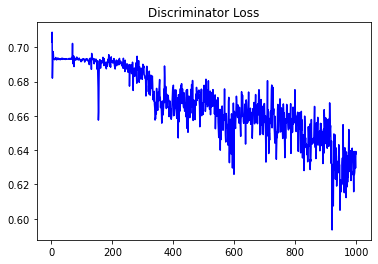

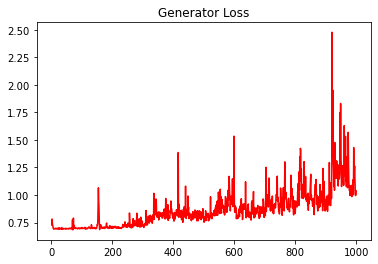

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3291770549651747


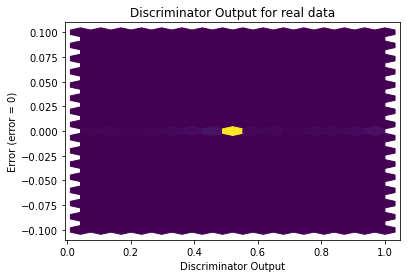

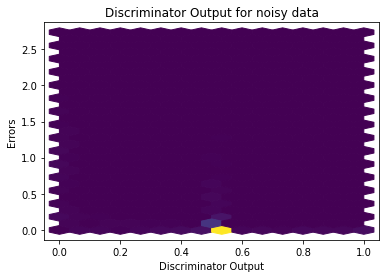

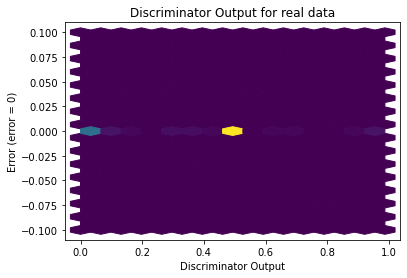

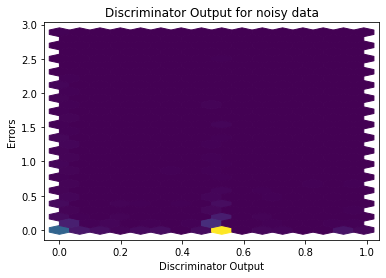

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

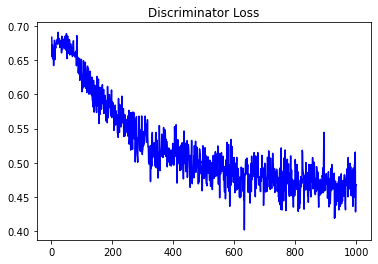

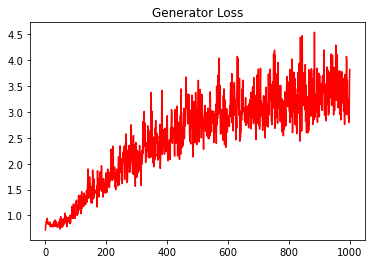

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.24556926293372788


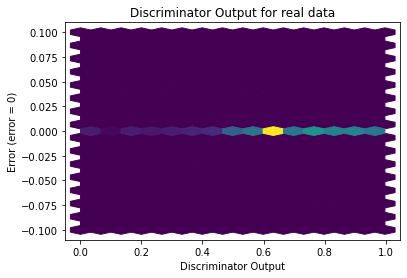

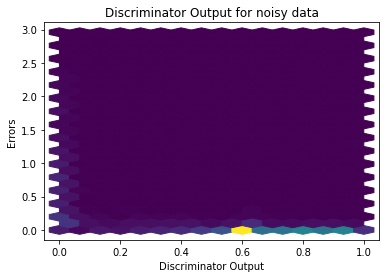

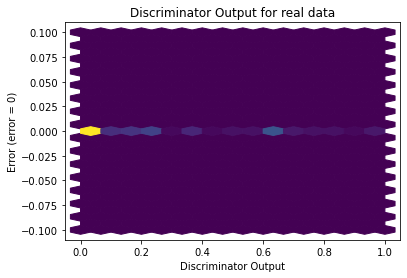

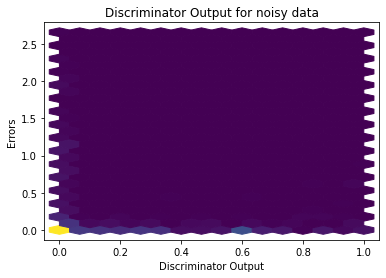

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


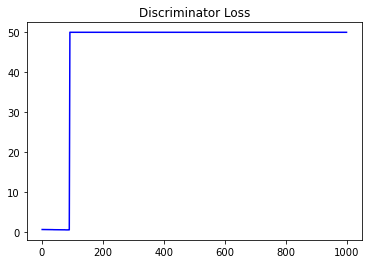

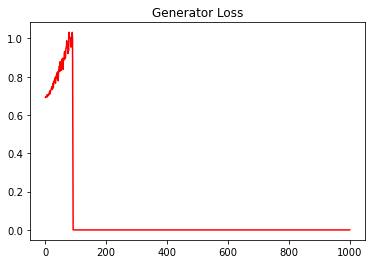

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
288.35858047556644


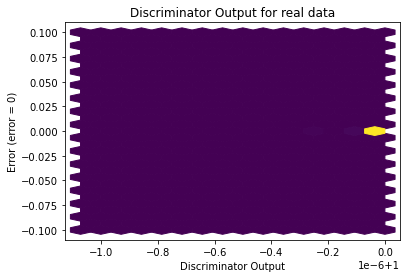

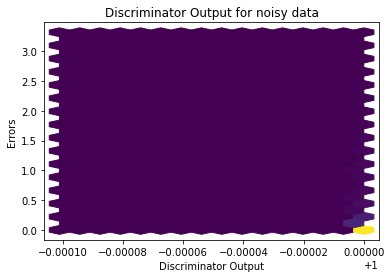

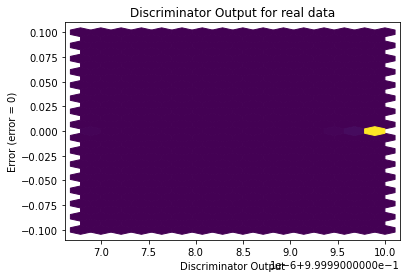

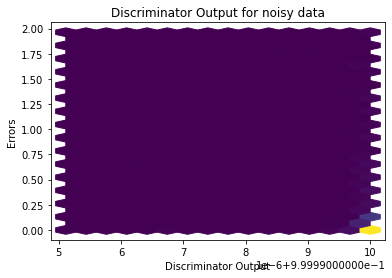

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


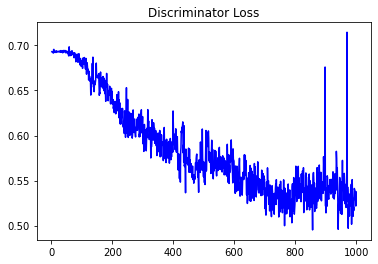

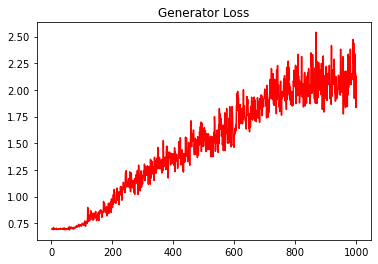

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.2643767476181029


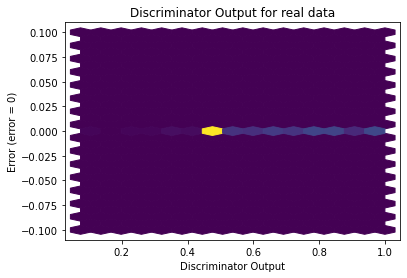

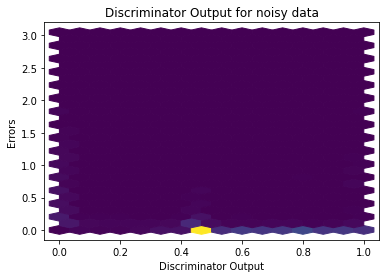

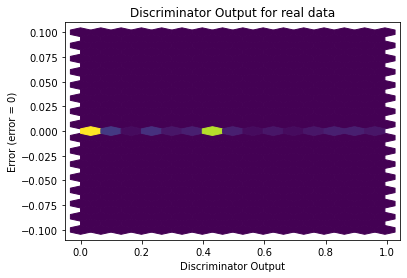

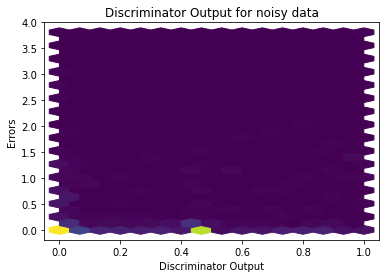

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0923]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2122]], requires_grad=True)
